# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

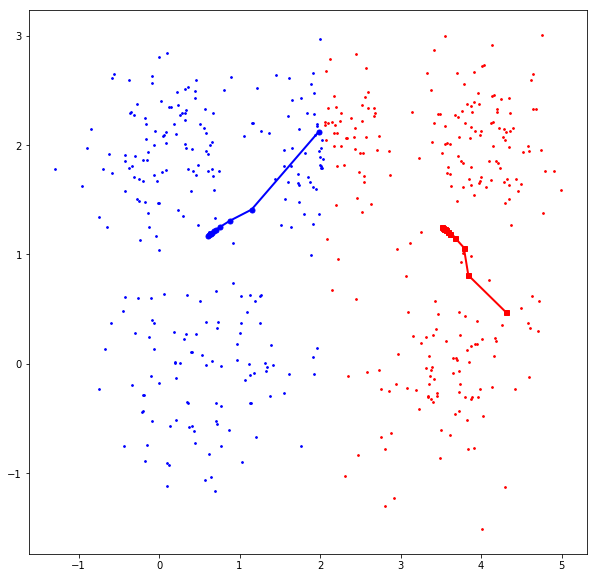

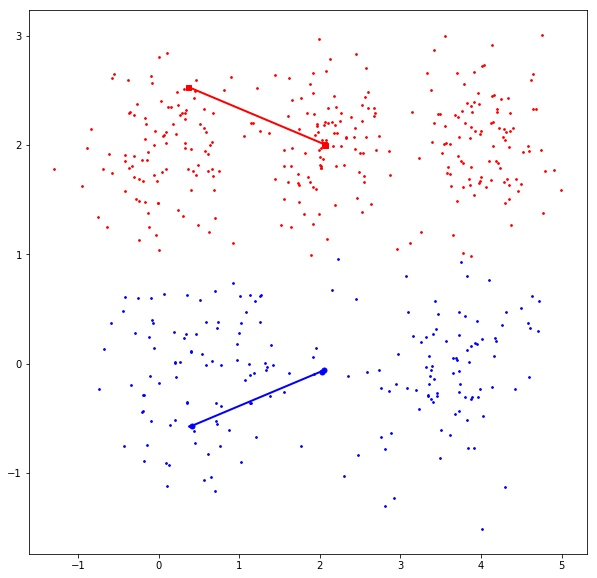

In [15]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want
min_val = 1e8
x_min = None
idx_min = None
ctrs_min = None
iter_ctrs_min = None
max_val = -1
x_max = None
idx_max = None
ctrs_max = None
iter_ctrs_max = None
for i in range(1000):
    idx, ctrs, iter_ctrs = kmeans(x, k)
    [n_points, p] = list(x.shape)
    x_ = x.reshape(n_points, 1, p).repeat(k, axis=1)
    ctrs_ = ctrs.reshape(1, k, p).repeat(n_points, axis=0)
    diff = x_ - ctrs_
    dist = np.sqrt(np.sum(diff*diff, axis=-1))
    sum_val = np.zeros((k))
    for j in range(n_points):
        sum_val[idx[j]] += dist[j, idx[j]]
    sm = np.sum(sum_val)
    if sm > max_val:
        max_val = sm
        x_max = x
        idx_max = idx
        ctrs_max = ctrs
        iter_ctrs_max = iter_ctrs
    if sm < min_val:
        min_val = sm
        x_min = x
        idx_min = idx
        ctrs_min = ctrs
        iter_ctrs_min = iter_ctrs
kmeans_plot(x_min, idx_min, ctrs_min, iter_ctrs_min)
kmeans_plot(x_max, idx_max, ctrs_max, iter_ctrs_max)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

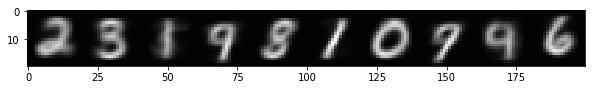

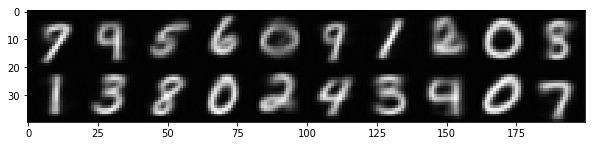

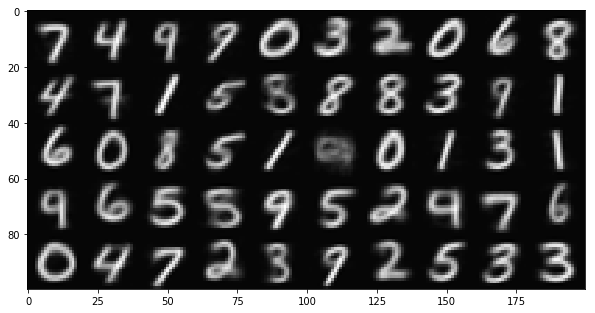

In [12]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

(134400, 3)


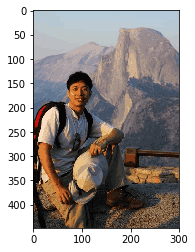

In [25]:
import kmeans
from matplotlib.pyplot import imread
img = imread('sample0.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64)
# YOUR (SEVERAL LINES) CODE HERE
# begin answer
print(fea.shape)
idx, ctrs, iter_ctrs = kmeans.kmeans(fea, 64)
out = ctrs[idx, :]

# end answer

# plt.imshow(fea.reshape(img.shape).astype(np.uint8))

plt.imshow(out.reshape(img.shape).astype(np.uint8))


